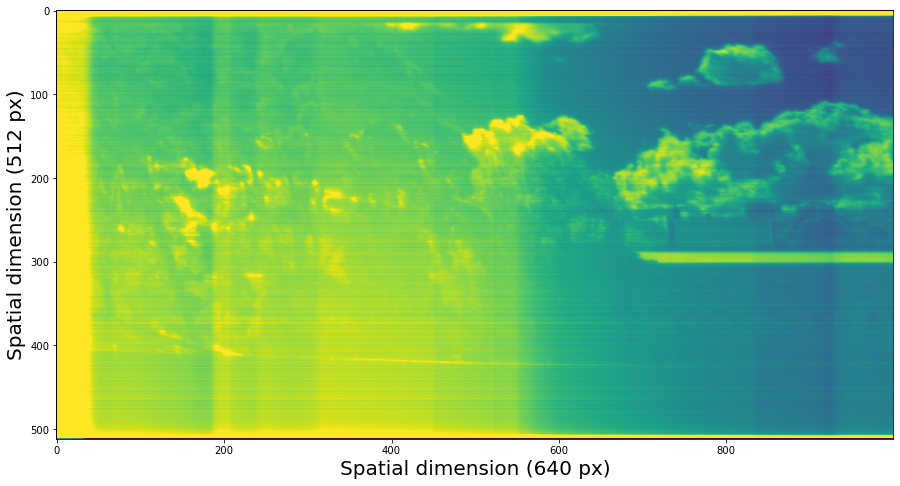

In [145]:
import netCDF4
import matplotlib.pyplot as plt
from scipy.ndimage import rotate


# Open the netCDF file using the netCDF4 library
ncfile = netCDF4.Dataset("C:/Users/al-na/Documents/2022_09_28/2022_09_28-02_58_11.nc", "r") #path to your datacube *netCDF file

data = ncfile.variables["datacube"][:] # datacube is the variable that contains the wavelengths dimension along with the two (x,y) spatial dimensions 

slice = data[19,:,:] # plotting the spatial dimensions for a wavelength stored in #19 which might be 1200 nm, for example!

# Plot the slice using imshow
slice = np.flip(slice, axis=1)

# Rotate the slice by 180 degrees in case you need to rotate your image 
slice_rotated = rotate(slice, 180)

# Plot the slice using imshow
plt.figure(figsize=(15, 15))
plt.xlabel("Spatial dimension (640 px)", fontsize=20)
plt.ylabel("Spatial dimension (512 px)", fontsize=20)
plt.imshow(slice_rotated,vmin=14, vmax=26, cmap="viridis")

# Show the plot
plt.show()